In [4]:
import pandas as pd
import numpy as np
from darts import TimeSeries
from darts.models import ExponentialSmoothing
from darts.models.forecasting.tbats import TBATS
import matplotlib.pyplot as plt

In [5]:
df = pd.read_excel('geracao.xlsx',header = 1).iloc[1:,13:].fillna(method = 'bfill').iloc[0:1].T.rename({1:'geracao'},axis = 1)
df = df.set_index(pd.date_range(start = '2000-01-01',periods = len(df),freq = 'm'))

<AxesSubplot:>

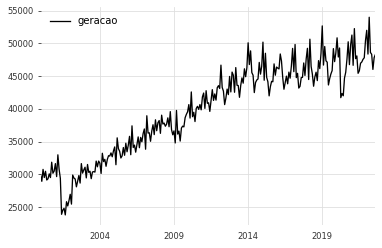

In [6]:
df.plot()

In [7]:
series = TimeSeries.from_dataframe(df)
train,test = series[:-60],series[-60:]

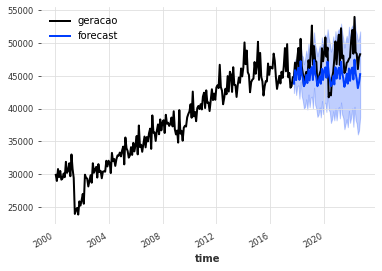

In [37]:
model = TBATS(use_box_cox = True,box_cox_bounds=(0, 10),use_trend = False,use_arma_errors = True)
model.fit(train)
prediction = model.predict(len(test), num_samples=1000)
series.plot()
prediction.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()

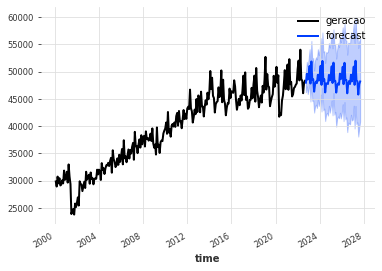

In [38]:
model = TBATS(use_box_cox = True,box_cox_bounds=(0, 10),use_trend = False,use_arma_errors = True)
model.fit(series)
prediction = model.predict(60, num_samples=1000)
series.plot()
prediction.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()